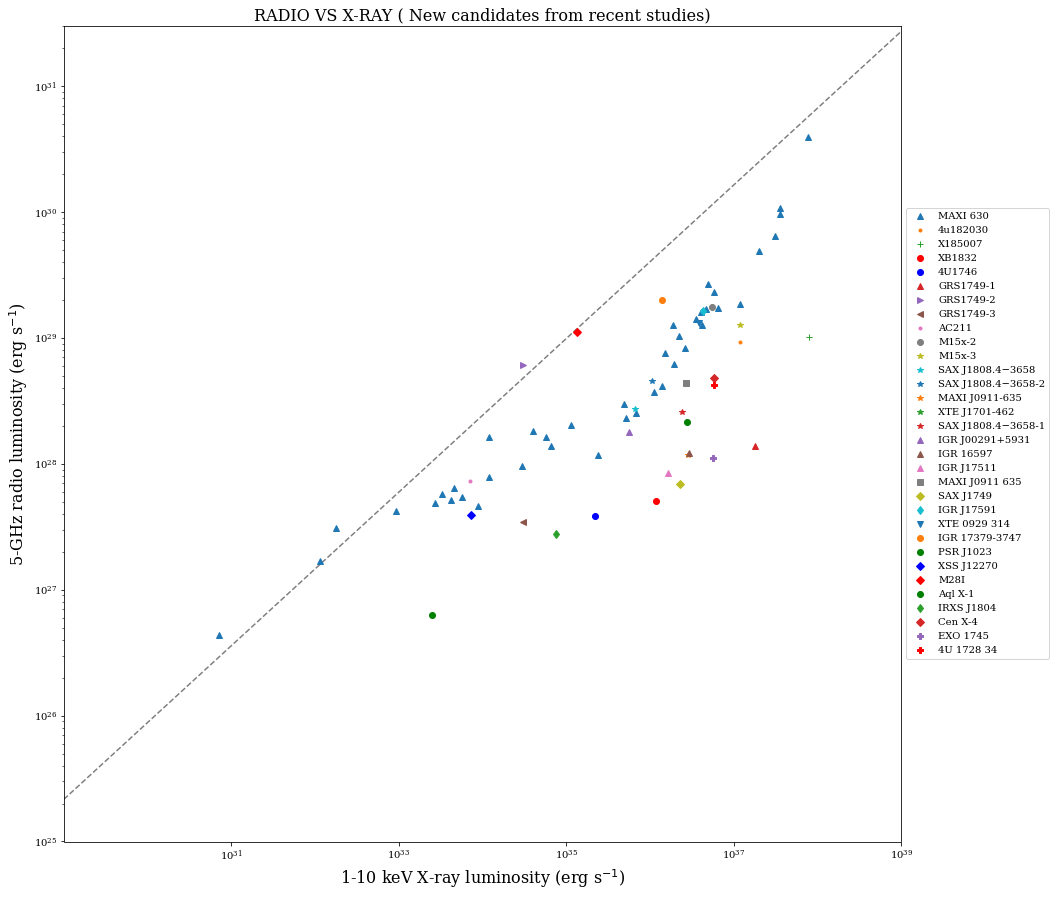

In [4]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

#plt.plot(IGR1728xray,IGR1728radio,'o',label='IGR 1728') # at 12 Mpc
xraymaxi630,radiomaxi630= np.loadtxt('MAXI 630 outburst.txt', delimiter=',', unpack=True)
NSxray,NSradio = np.loadtxt('4U182030and otherNS.txt', delimiter=',', unpack=True)
SAXxray,SAXradio = np.loadtxt('SAX1808.txt', delimiter=',', unpack=True)
AMSPxray,AMSPradio = np.loadtxt('AMXP.txt', delimiter=',', unpack=True)

#plot
fig = plt.figure(figsize=(15, 15))

# logarithmic slop
fit_x = np.logspace(29,39,num=10,base=10)
plt.plot(fit_x,pow(10,(29.65+0.15-(0.61*36.32)))*pow(fit_x,0.61),'k--',zorder=1,alpha=0.5) 
plt.plot(xraymaxi630,radiomaxi630, '^',label='MAXI 630')
#plt.plot(IGR1728xray,IGR1728radio,'o',label='IGR 1728') # at 12 Mpc  file is missinf

#NS family
plt.plot(NSxray[0],NSradio[0],'.',label='4u182030')
plt.plot(NSxray[1],NSradio[1],'+',label='X185007')
plt.plot(NSxray[2],NSradio[2],'o',label='XB1832',color='red')
plt.plot(NSxray[3],NSradio[3],'o',label='4U1746',color='blue')
plt.plot(NSxray[4],NSradio[4],'^',label='GRS1749-1')
plt.plot(NSxray[5],NSradio[5],'>',label='GRS1749-2')
plt.plot(NSxray[5],NSradio[6],'<',label='GRS1749-3')
plt.plot(NSxray[7],NSradio[7],'.',label='AC211')
plt.plot(NSxray[8],NSradio[8],'o',label='M15x-2')
plt.plot(NSxray[9],NSradio[9],'*',label='M15x-3')

#sax1808
plt.plot(SAXxray[0],SAXradio[0],'*',label='SAX J1808.4−3658')
plt.plot(SAXxray[1],SAXradio[1],'*',label='SAX J1808.4−3658-2')
plt.plot(SAXxray[2],SAXradio[2],'*',label='MAXI J0911-635')
plt.plot(SAXxray[3],SAXradio[3],'*',label='XTE J1701-462')

#AMXP
plt.plot(AMSPxray[0],AMSPradio[0],'*',label='SAX J1808.4−3658-1')
plt.plot(AMSPxray[1],AMSPradio[1],'^',label='IGR J00291+5931')
plt.plot(AMSPxray[2],AMSPradio[2],'^',label='IGR 16597')
plt.plot(AMSPxray[3],AMSPradio[3],'^',label='IGR J17511')
plt.plot(AMSPxray[4],AMSPradio[4],'s',label='MAXI J0911 635')
plt.plot(AMSPxray[5],AMSPradio[5],'D',label='SAX J1749')
plt.plot(AMSPxray[6],AMSPradio[6],'d',label='IGR J17591')
plt.plot(AMSPxray[7],AMSPradio[7],'v',label='XTE 0929 314')
plt.plot(AMSPxray[8],AMSPradio[8],'o',label='IGR 17379-3747')
plt.plot(AMSPxray[9],AMSPradio[9],'o',color='g',label='PSR J1023')
plt.plot(AMSPxray[10],AMSPradio[10],'D',color='b',label='XSS J12270')
plt.plot(AMSPxray[11],AMSPradio[11],'D',color='r',label='M28I')
plt.plot(AMSPxray[12],AMSPradio[12],'o',color='g',label='Aql X-1')
plt.plot(AMSPxray[13],AMSPradio[13],'d',label='IRXS J1804')
plt.plot(AMSPxray[14],AMSPradio[14],'D',label='Cen X-4')
plt.plot(AMSPxray[15],AMSPradio[15],'P',label='EXO 1745')
plt.plot(AMSPxray[16],AMSPradio[16],'P',color='red',label='4U 1728 34')

#label
plt.xlabel(r'1-10 keV X-ray luminosity (erg s$^{-1}$)', fontsize=16)
plt.ylabel(r'5-GHz radio luminosity (erg s$^{-1}$)', fontsize=16)
plt.xlim(1.01e29, 1e39)
plt.ylim(1e25, 3e31)
plt.title('RADIO VS X-RAY ( New candidates from recent studies)', fontsize=16)
plt.xscale('log')
plt.yscale('log')
#legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


# LMXB from Bartemann s 2018

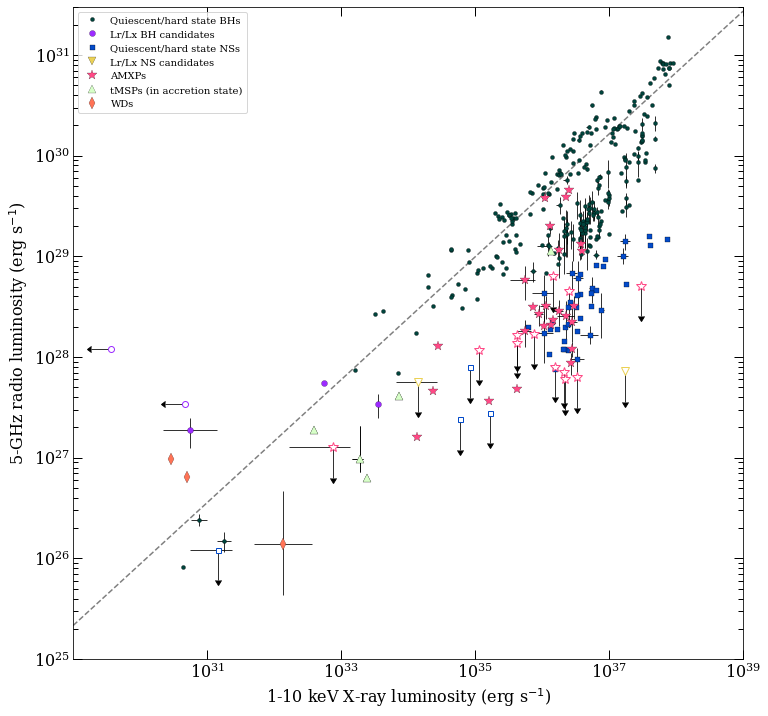

In [2]:
def data_reader(path_to_data = './Data/', include_oddsources=False):
    DATA_BHs = pd.read_csv(path_to_data+'lrlx_data_BHs.csv')
    DATA_candBHs = pd.read_csv(path_to_data+'lrlx_data_candidateBHs.csv')
    DATA_NSs = pd.read_csv(path_to_data+'lrlx_data_NSs.csv')
    DATA_canNSs = pd.read_csv(path_to_data+'lrlx_data_candidateNSs.csv')
    DATA_AMXPs = pd.read_csv(path_to_data+'lrlx_data_AMXPs.csv')
    DATA_tMSPs = pd.read_csv(path_to_data+'lrlx_data_tMSPs.csv')
    DATA_WDs = pd.read_csv(path_to_data+'lrlx_data_WDs.csv')
    if include_oddsources:
        DATA_oddsrcs = pd.read_csv(path_to_data+'lrlx_data_oddsrcs.csv')
        DATA_LIST = [DATA_BHs, DATA_candBHs, DATA_NSs, 
                     DATA_canNSs, DATA_AMXPs, DATA_tMSPs, 
                     DATA_tMSPs, DATA_WDs, DATA_oddsrcs]
    else:
        DATA_LIST = [DATA_BHs, DATA_candBHs, DATA_NSs, 
                     DATA_canNSs, DATA_AMXPs, DATA_tMSPs, 
                     DATA_tMSPs, DATA_WDs]
    DATA = pd.concat(DATA_LIST,ignore_index=True)

    return DATA


def plotter(data, classes, fig, errorbars=True, uplims=True, cor_lines=True):    
    # BW print-friendly color palette adopted from CubeHelix by Matt Davis
    colorset = ['#000000', '#00270C', '#00443C', '#005083', 
                '#034BCA', '#483CFC', '#9C2BFF', '#EB24F4', 
                '#FF2DC2', '#FF4986', '#FF7356', '#FFA443', 
                '#EBD155', '#D3F187', '#D7FFC8', '#FFFFFF']


    # Matplotlib configuration to emulate text with LaTeX
    # By default it is off, set usetex=True to change.
    rc('text', usetex=False)
    rc('font', **{'family' : 'serif'})
    
    ax = fig.add_subplot(1,1,1)

    no_uplimdata = data[data['uplim'] == 'None']
    uplimdata = data[data['uplim'] != 'None']

    # Detection data points:
    if 'BH' in classes:
        cond = no_uplimdata['Class'] == 'BH'
        ax.loglog(no_uplimdata[cond]['Lx'],no_uplimdata[cond]['Lr'],
                  'o',ms=4, c=colorset[2],mec='k',zorder=2,mew=0.3,label='Quiescent/hard state BHs')
    if 'candidateBH' in classes:
        cond = no_uplimdata['Class'] == 'candidateBH'
        ax.loglog(no_uplimdata[cond]['Lx'],no_uplimdata[cond]['Lr'],
                  'o',ms=6, c=colorset[6],mec='k',mew=0.2,zorder=3,label='Lr/Lx BH candidates')
    if 'NS' in classes:
        cond = no_uplimdata['Class'] == 'NS'
        ax.loglog(no_uplimdata[cond]['Lx'],no_uplimdata[cond]['Lr'],
                  's',ms=5, c=colorset[4],mec='k',mew=0.3,zorder=3,label='Quiescent/hard state NSs')
    if 'candidateNS' in classes:
        cond = no_uplimdata['Class'] == 'candidateNS'
        ax.loglog(no_uplimdata[cond]['Lx'],no_uplimdata[cond]['Lr'],
                  'v',ms=8, c=colorset[12],mec='k',mew=0.2,zorder=3,label='Lr/Lx NS candidates')
    if 'AMXP' in classes:
        cond = no_uplimdata['Class'] == 'AMXP'
        ax.loglog(no_uplimdata[cond]['Lx'],no_uplimdata[cond]['Lr'],
                  '*',ms=10,c=colorset[9],mec='k',mew=0.2,zorder=5,label='AMXPs')
    if 'tMSP' in classes:
        cond = no_uplimdata['Class'] == 'tMSP'
        ax.loglog(no_uplimdata[cond]['Lx'],no_uplimdata[cond]['Lr'],
                  '^',ms=8,c=colorset[14],mec='k',mew=0.2,zorder=2,label='tMSPs (in accretion state)')
    if 'WD' in classes:
        cond = no_uplimdata['Class'] == 'WD'
        ax.loglog(no_uplimdata[cond]['Lx'],no_uplimdata[cond]['Lr'],
                  'd',ms=8, c=colorset[10],mec='k',mew=0.2,zorder=6,label='WDs')
    
    # Plotting errorbars (if available):
    if errorbars and uplims:
        errorbardata = data[data['Class'].isin(classes)]
        ax.errorbar(x=errorbardata['Lx'], y=errorbardata['Lr'], 
                    yerr=[errorbardata['Lr_ler'],errorbardata['Lr_uer']], 
                    xerr=[errorbardata['Lx_ler'],errorbardata['Lx_uer']],
                    fmt='.', ms=0,ecolor='k', zorder=0, elinewidth=0.8)

    elif errorbars and ~uplims:
        errorbardata = no_uplimdata[no_uplimdata['Class'].isin(no_uplimdata)]
        ax.errorbar(x=errorbardata['Lx'], y=errorbardata['Lr'], 
                    yerr=[errorbardata['Lr_ler'],errorbardata['Lr_uer']], 
                    xerr=[errorbardata['Lx_ler'],errorbardata['Lx_uer']],
                    fmt='.', ms=0,ecolor='k', zorder=0, elinewidth=0.8)

    # Plotting upper limits:
    if uplims:
        if 'BH' in classes:
            cond = uplimdata['Class'] == 'BH'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      'o',ms=4, mec=colorset[2], mfc='w',zorder=2,mew=1)
        if 'candidateBH' in classes:
            cond = uplimdata['Class'] == 'candidateBH'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      'o',ms=6, mec=colorset[6],mfc='w',mew=1,zorder=3)
        if 'NS' in classes:
            cond = uplimdata['Class'] == 'NS'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      's',ms=5, mec=colorset[4],mfc='w',mew=1,zorder=3)
        if 'candidateNS' in classes:
            cond = uplimdata['Class'] == 'candidateNS'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      'v',ms=8, mec=colorset[12],mfc='w',mew=1,zorder=3)
        if 'AMXP' in classes:
            cond = uplimdata['Class'] == 'AMXP'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      '*',ms=10,mec=colorset[9],mfc='w',mew=1,zorder=5)
        if 'tMSP' in classes:
            cond = uplimdata['Class'] == 'tMSP'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      '^',ms=8,mec=colorset[14],mfc='w',mew=1,zorder=2)
        if 'WD' in classes:
            cond = uplimdata['Class'] == 'WD'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      'd',ms=8, mec=colorset[10],mfc='w',mew=1,zorder=6)
        
    
        
        Xlimit_data = data[data['Class'].isin(classes) & (data['uplim']=='Lx')]
        ax.errorbar(x=Xlimit_data['Lx'], 
                    y=Xlimit_data['Lr'], 
                    xerr=Xlimit_data['Lx']*0.5, xuplims=True,
                    fmt='.', ms=0,ecolor='k', zorder=0, elinewidth=0.8)
        Rlimit_data = data[data['Class'].isin(classes) & (data['uplim']=='Lr')]
        ax.errorbar(x=Rlimit_data['Lx'], 
                    y=Rlimit_data['Lr'], 
                    yerr=Rlimit_data['Lr']*0.5, uplims=True,
                    fmt='.', ms=0,ecolor='k', zorder=0, elinewidth=0.8)

    if cor_lines:
        # Plotting fitted lines:
        fit_x = np.logspace(29,39,num=10,base=10)
        # BH
        ax.loglog(fit_x,pow(10,(29.65+0.15-(0.61*36.32)))*pow(fit_x,0.61),
                  'k--',zorder=1,alpha=0.5)
        
    # Artist functions:
    ax.legend()
    ax.set_xlabel(r'1-10 keV X-ray luminosity (erg s$^{-1}$)', fontsize=16)
    ax.set_xlim(1.01e29, 1e39)
    ax.set_ylabel(r'5-GHz radio luminosity (erg s$^{-1}$)', fontsize=16)
    ax.set_ylim(1e25, 3e31)
    ax.tick_params('both', length=9, width=1, which='major')
    ax.tick_params('both', length=5, width=1, which='minor')
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)
    return fig


def main_function():
    DATA = data_reader()
    CLASSES = ['BH', 'candidateBH', 'NS', 'candidateNS', 'AMXP', 'tMSP', 'WD']   
    FIG = plt.figure(figsize=(12,12))
    plotter(DATA,CLASSES,fig=FIG, uplims=True);
    #FIG.savefig('lrlx_plot.jpg', dpi=300, bbox_inches='tight')
    return FIG

main_function();

# A.Bartemann  plot  with new candidates

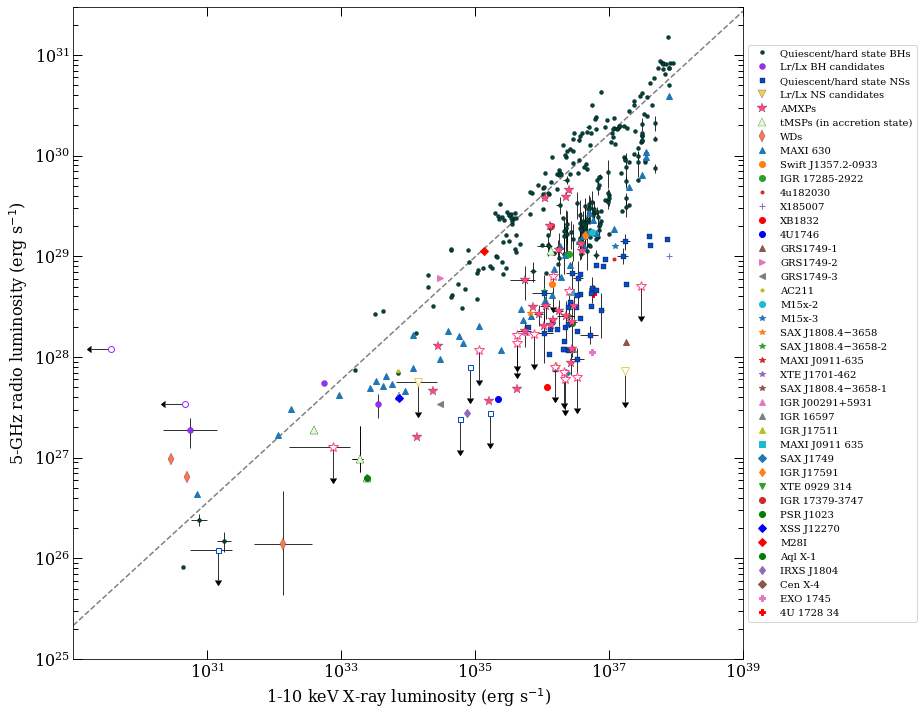

In [3]:
def data_reader(path_to_data = './Data/', include_oddsources=False):
    DATA_BHs = pd.read_csv(path_to_data+'lrlx_data_BHs.csv')
    DATA_candBHs = pd.read_csv(path_to_data+'lrlx_data_candidateBHs.csv')
    DATA_NSs = pd.read_csv(path_to_data+'lrlx_data_NSs.csv')
    DATA_canNSs = pd.read_csv(path_to_data+'lrlx_data_candidateNSs.csv')
    DATA_AMXPs = pd.read_csv(path_to_data+'lrlx_data_AMXPs.csv')
    DATA_tMSPs = pd.read_csv(path_to_data+'lrlx_data_tMSPs.csv')
    DATA_WDs = pd.read_csv(path_to_data+'lrlx_data_WDs.csv')
    if include_oddsources:
        DATA_oddsrcs = pd.read_csv(path_to_data+'lrlx_data_oddsrcs.csv')
        DATA_LIST = [DATA_BHs, DATA_candBHs, DATA_NSs, 
                     DATA_canNSs, DATA_AMXPs, DATA_tMSPs, 
                     DATA_tMSPs, DATA_WDs, DATA_oddsrcs]
    else:
        DATA_LIST = [DATA_BHs, DATA_candBHs, DATA_NSs, 
                     DATA_canNSs, DATA_AMXPs, DATA_tMSPs, 
                     DATA_tMSPs, DATA_WDs]
    DATA = pd.concat(DATA_LIST,ignore_index=True)

    return DATA


def plotter(data, classes, fig, errorbars=True, uplims=True, cor_lines=True):    
    # BW print-friendly color palette adopted from CubeHelix by Matt Davis
    colorset = ['#000000', '#00270C', '#00443C', '#005083', 
                '#034BCA', '#483CFC', '#9C2BFF', '#EB24F4', 
                '#FF2DC2', '#FF4986', '#FF7356', '#FFA443', 
                '#EBD155', '#D3F187', '#D7FFC8', '#FFFFFF']


    # Matplotlib configuration to emulate text with LaTeX
    # By default it is off, set usetex=True to change.
    rc('text', usetex=False)
    rc('font', **{'family' : 'serif'})
    
    ax = fig.add_subplot(1,1,1)

    no_uplimdata = data[data['uplim'] == 'None']
    uplimdata = data[data['uplim'] != 'None']

    # Detection data points:
    if 'BH' in classes:
        cond = no_uplimdata['Class'] == 'BH'
        ax.loglog(no_uplimdata[cond]['Lx'],no_uplimdata[cond]['Lr'],
                  'o',ms=4, c=colorset[2],mec='k',zorder=2,mew=0.3,label='Quiescent/hard state BHs')
    if 'candidateBH' in classes:
        cond = no_uplimdata['Class'] == 'candidateBH'
        ax.loglog(no_uplimdata[cond]['Lx'],no_uplimdata[cond]['Lr'],
                  'o',ms=6, c=colorset[6],mec='k',mew=0.2,zorder=3,label='Lr/Lx BH candidates')
    if 'NS' in classes:
        cond = no_uplimdata['Class'] == 'NS'
        ax.loglog(no_uplimdata[cond]['Lx'],no_uplimdata[cond]['Lr'],
                  's',ms=5, c=colorset[4],mec='k',mew=0.3,zorder=3,label='Quiescent/hard state NSs')
    if 'candidateNS' in classes:
        cond = no_uplimdata['Class'] == 'candidateNS'
        ax.loglog(no_uplimdata[cond]['Lx'],no_uplimdata[cond]['Lr'],
                  'v',ms=8, c=colorset[12],mec='k',mew=0.2,zorder=3,label='Lr/Lx NS candidates')
    if 'AMXP' in classes:
        cond = no_uplimdata['Class'] == 'AMXP'
        ax.loglog(no_uplimdata[cond]['Lx'],no_uplimdata[cond]['Lr'],
                  '*',ms=10,c=colorset[9],mec='k',mew=0.2,zorder=5,label='AMXPs')
    if 'tMSP' in classes:
        cond = no_uplimdata['Class'] == 'tMSP'
        ax.loglog(no_uplimdata[cond]['Lx'],no_uplimdata[cond]['Lr'],
                  '^',ms=8,c=colorset[14],mec='k',mew=0.2,zorder=2,label='tMSPs (in accretion state)')
    if 'WD' in classes:
        cond = no_uplimdata['Class'] == 'WD'
        ax.loglog(no_uplimdata[cond]['Lx'],no_uplimdata[cond]['Lr'],
                  'd',ms=8, c=colorset[10],mec='k',mew=0.2,zorder=6,label='WDs')
    
    # Plotting errorbars (if available):
    if errorbars and uplims:
        errorbardata = data[data['Class'].isin(classes)]
        ax.errorbar(x=errorbardata['Lx'], y=errorbardata['Lr'], 
                    yerr=[errorbardata['Lr_ler'],errorbardata['Lr_uer']], 
                    xerr=[errorbardata['Lx_ler'],errorbardata['Lx_uer']],
                    fmt='.', ms=0,ecolor='k', zorder=0, elinewidth=0.8)

    elif errorbars and ~uplims:
        errorbardata = no_uplimdata[no_uplimdata['Class'].isin(no_uplimdata)]
        ax.errorbar(x=errorbardata['Lx'], y=errorbardata['Lr'], 
                    yerr=[errorbardata['Lr_ler'],errorbardata['Lr_uer']], 
                    xerr=[errorbardata['Lx_ler'],errorbardata['Lx_uer']],
                    fmt='.', ms=0,ecolor='k', zorder=0, elinewidth=0.8)

    # Plotting upper limits:
    if uplims:
        if 'BH' in classes:
            cond = uplimdata['Class'] == 'BH'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      'o',ms=4, mec=colorset[2], mfc='w',zorder=2,mew=1)
        if 'candidateBH' in classes:
            cond = uplimdata['Class'] == 'candidateBH'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      'o',ms=6, mec=colorset[6],mfc='w',mew=1,zorder=3)
        if 'NS' in classes:
            cond = uplimdata['Class'] == 'NS'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      's',ms=5, mec=colorset[4],mfc='w',mew=1,zorder=3)
        if 'candidateNS' in classes:
            cond = uplimdata['Class'] == 'candidateNS'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      'v',ms=8, mec=colorset[12],mfc='w',mew=1,zorder=3)
        if 'AMXP' in classes:
            cond = uplimdata['Class'] == 'AMXP'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      '*',ms=10,mec=colorset[9],mfc='w',mew=1,zorder=5)
        if 'tMSP' in classes:
            cond = uplimdata['Class'] == 'tMSP'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      '^',ms=8,mec=colorset[14],mfc='w',mew=1,zorder=2)
        if 'WD' in classes:
            cond = uplimdata['Class'] == 'WD'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      'd',ms=8, mec=colorset[10],mfc='w',mew=1,zorder=6)
        
    
        
        Xlimit_data = data[data['Class'].isin(classes) & (data['uplim']=='Lx')]
        ax.errorbar(x=Xlimit_data['Lx'], 
                    y=Xlimit_data['Lr'], 
                    xerr=Xlimit_data['Lx']*0.5, xuplims=True,
                    fmt='.', ms=0,ecolor='k', zorder=0, elinewidth=0.8)
        Rlimit_data = data[data['Class'].isin(classes) & (data['uplim']=='Lr')]
        ax.errorbar(x=Rlimit_data['Lx'], 
                    y=Rlimit_data['Lr'], 
                    yerr=Rlimit_data['Lr']*0.5, uplims=True,
                    fmt='.', ms=0,ecolor='k', zorder=0, elinewidth=0.8)

    if cor_lines:
        # Plotting fitted lines:
        fit_x = np.logspace(29,39,num=10,base=10)
        # BH
        ax.loglog(fit_x,pow(10,(29.65+0.15-(0.61*36.32)))*pow(fit_x,0.61),
                  'k--',zorder=1,alpha=0.5)
        
    # Artist functions:
    ax.legend()
    ax.set_xlabel(r'1-10 keV X-ray luminosity (erg s$^{-1}$)', fontsize=16)
    ax.set_xlim(1.01e29, 1e39)
    ax.set_ylabel(r'5-GHz radio luminosity (erg s$^{-1}$)', fontsize=16)
    ax.set_ylim(1e25, 3e31)
    ax.tick_params('both', length=9, width=1, which='major')
    ax.tick_params('both', length=5, width=1, which='minor')
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)
    return fig


def main_function():
    DATA = data_reader()
    CLASSES = ['BH', 'candidateBH', 'NS', 'candidateNS', 'AMXP', 'tMSP', 'WD']   
    FIG = plt.figure(figsize=(12,12))
    plotter(DATA,CLASSES,fig=FIG, uplims=True);
    #FIG.savefig('lrlx_plot.jpg', dpi=300, bbox_inches='tight')
    return FIG

main_function();

xraymaxi630,radiomaxi630= np.loadtxt('MAXI 630 outburst.txt', delimiter=',', unpack=True)
NSxray,NSradio = np.loadtxt('4U182030and otherNS.txt', delimiter=',', unpack=True)
SAXxray,SAXradio = np.loadtxt('SAX1808.txt', delimiter=',', unpack=True)
AMSPxray,AMSPradio = np.loadtxt('AMXP.txt', delimiter=',', unpack=True)
IGRxray,IGRradio = np.loadtxt('IGRJ17285.txt', delimiter=',', unpack=True)

#Maxi630
plt.plot(xraymaxi630,radiomaxi630, '^',label='MAXI 630')

#IGR
plt.plot(IGRxray[0],IGRradio[0],'o',label='Swift J1357.2-0933') 
plt.plot(IGRxray[1],IGRradio[1],'o',label='IGR 17285-2922') # at 12 Mpc  

#NS family
plt.plot(NSxray[0],NSradio[0],'.',label='4u182030')
plt.plot(NSxray[1],NSradio[1],'+',label='X185007')
plt.plot(NSxray[2],NSradio[2],'o',label='XB1832',color='red')
plt.plot(NSxray[3],NSradio[3],'o',label='4U1746',color='blue')
plt.plot(NSxray[4],NSradio[4],'^',label='GRS1749-1')
plt.plot(NSxray[5],NSradio[5],'>',label='GRS1749-2')
plt.plot(NSxray[5],NSradio[6],'<',label='GRS1749-3')
plt.plot(NSxray[7],NSradio[7],'.',label='AC211')
plt.plot(NSxray[8],NSradio[8],'o',label='M15x-2')
plt.plot(NSxray[9],NSradio[9],'*',label='M15x-3')

#sax1808
plt.plot(SAXxray[0],SAXradio[0],'*',label='SAX J1808.4−3658')
plt.plot(SAXxray[1],SAXradio[1],'*',label='SAX J1808.4−3658-2')
plt.plot(SAXxray[2],SAXradio[2],'*',label='MAXI J0911-635')
plt.plot(SAXxray[3],SAXradio[3],'*',label='XTE J1701-462')

#AMXP
plt.plot(AMSPxray[0],AMSPradio[0],'*',label='SAX J1808.4−3658-1')
plt.plot(AMSPxray[1],AMSPradio[1],'^',label='IGR J00291+5931')
plt.plot(AMSPxray[2],AMSPradio[2],'^',label='IGR 16597')
plt.plot(AMSPxray[3],AMSPradio[3],'^',label='IGR J17511')
plt.plot(AMSPxray[4],AMSPradio[4],'s',label='MAXI J0911 635')
plt.plot(AMSPxray[5],AMSPradio[5],'D',label='SAX J1749')
plt.plot(AMSPxray[6],AMSPradio[6],'d',label='IGR J17591')
plt.plot(AMSPxray[7],AMSPradio[7],'v',label='XTE 0929 314')
plt.plot(AMSPxray[8],AMSPradio[8],'o',label='IGR 17379-3747')
plt.plot(AMSPxray[9],AMSPradio[9],'o',color='g',label='PSR J1023')
plt.plot(AMSPxray[10],AMSPradio[10],'D',color='b',label='XSS J12270')
plt.plot(AMSPxray[11],AMSPradio[11],'D',color='r',label='M28I')
plt.plot(AMSPxray[12],AMSPradio[12],'o',color='g',label='Aql X-1')
plt.plot(AMSPxray[13],AMSPradio[13],'d',label='IRXS J1804')
plt.plot(AMSPxray[14],AMSPradio[14],'D',label='Cen X-4')
plt.plot(AMSPxray[15],AMSPradio[15],'P',label='EXO 1745')
plt.plot(AMSPxray[16],AMSPradio[16],'P',color='red',label='4U 1728 34')

#legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Only LMXB Black holes

#LMXB from Bartemann s 2018

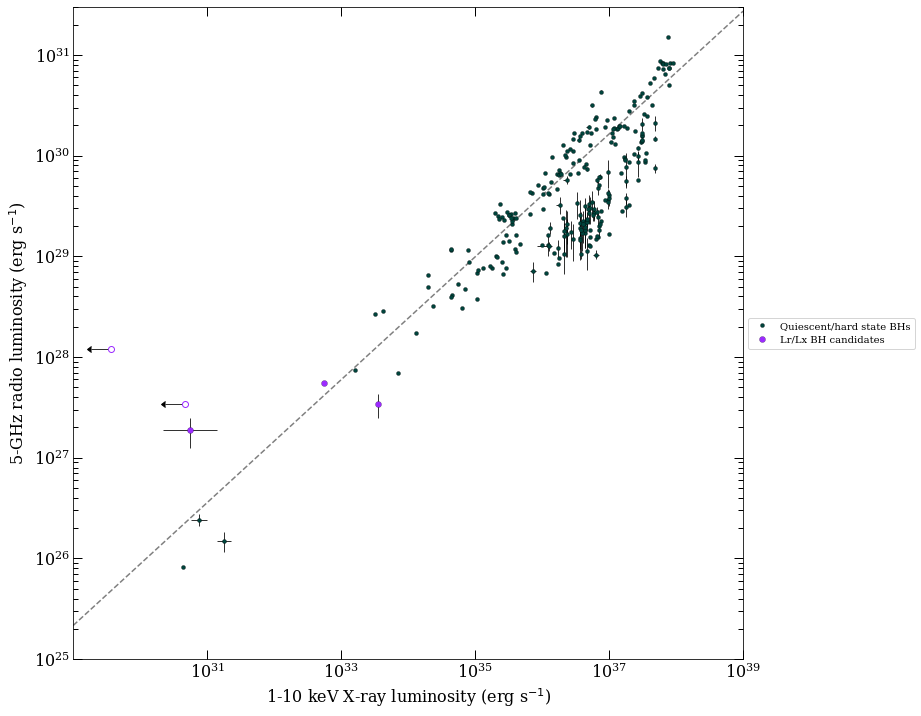

In [13]:
def data_reader(path_to_data = './Data/', include_oddsources=False):
    DATA_BHs = pd.read_csv(path_to_data+'lrlx_data_BHs.csv')
    DATA_candBHs = pd.read_csv(path_to_data+'lrlx_data_candidateBHs.csv')
    DATA_NSs = pd.read_csv(path_to_data+'lrlx_data_NSs.csv')
    DATA_canNSs = pd.read_csv(path_to_data+'lrlx_data_candidateNSs.csv')
    DATA_AMXPs = pd.read_csv(path_to_data+'lrlx_data_AMXPs.csv')
    DATA_tMSPs = pd.read_csv(path_to_data+'lrlx_data_tMSPs.csv')
    DATA_WDs = pd.read_csv(path_to_data+'lrlx_data_WDs.csv')
    if include_oddsources:
        DATA_oddsrcs = pd.read_csv(path_to_data+'lrlx_data_oddsrcs.csv')
        DATA_LIST = [DATA_BHs, DATA_candBHs, DATA_oddsrcs]
    else:
        DATA_LIST = [DATA_BHs, DATA_candBHs]
    DATA = pd.concat(DATA_LIST,ignore_index=True)

    return DATA


def plotter(data, classes, fig, errorbars=True, uplims=True, cor_lines=True):    
    # BW print-friendly color palette adopted from CubeHelix by Matt Davis
    colorset = ['#000000', '#00270C', '#00443C', '#005083', 
                '#034BCA', '#483CFC', '#9C2BFF', '#EB24F4', 
                '#FF2DC2', '#FF4986', '#FF7356', '#FFA443', 
                '#EBD155', '#D3F187', '#D7FFC8', '#FFFFFF']


    # Matplotlib configuration to emulate text with LaTeX
    # By default it is off, set usetex=True to change.
    rc('text', usetex=False)
    rc('font', **{'family' : 'serif'})
    
    ax = fig.add_subplot(1,1,1)

    no_uplimdata = data[data['uplim'] == 'None']
    uplimdata = data[data['uplim'] != 'None']

    # Detection data points:
    if 'BH' in classes:
        cond = no_uplimdata['Class'] == 'BH'
        ax.loglog(no_uplimdata[cond]['Lx'],no_uplimdata[cond]['Lr'],
                  'o',ms=4, c=colorset[2],mec='k',zorder=2,mew=0.3,label='Quiescent/hard state BHs')
    if 'candidateBH' in classes:
        cond = no_uplimdata['Class'] == 'candidateBH'
        ax.loglog(no_uplimdata[cond]['Lx'],no_uplimdata[cond]['Lr'],
                  'o',ms=6, c=colorset[6],mec='k',mew=0.2,zorder=3,label='Lr/Lx BH candidates')
    
    # Plotting errorbars (if available):
    if errorbars and uplims:
        errorbardata = data[data['Class'].isin(classes)]
        ax.errorbar(x=errorbardata['Lx'], y=errorbardata['Lr'], 
                    yerr=[errorbardata['Lr_ler'],errorbardata['Lr_uer']], 
                    xerr=[errorbardata['Lx_ler'],errorbardata['Lx_uer']],
                    fmt='.', ms=0,ecolor='k', zorder=0, elinewidth=0.8)

    elif errorbars and ~uplims:
        errorbardata = no_uplimdata[no_uplimdata['Class'].isin(no_uplimdata)]
        ax.errorbar(x=errorbardata['Lx'], y=errorbardata['Lr'], 
                    yerr=[errorbardata['Lr_ler'],errorbardata['Lr_uer']], 
                    xerr=[errorbardata['Lx_ler'],errorbardata['Lx_uer']],
                    fmt='.', ms=0,ecolor='k', zorder=0, elinewidth=0.8)

    # Plotting upper limits:
    if uplims:
        if 'BH' in classes:
            cond = uplimdata['Class'] == 'BH'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      'o',ms=4, mec=colorset[2], mfc='w',zorder=2,mew=1)
        if 'candidateBH' in classes:
            cond = uplimdata['Class'] == 'candidateBH'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      'o',ms=6, mec=colorset[6],mfc='w',mew=1,zorder=3)
        if 'NS' in classes:
            cond = uplimdata['Class'] == 'NS'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      's',ms=5, mec=colorset[4],mfc='w',mew=1,zorder=3)
        if 'candidateNS' in classes:
            cond = uplimdata['Class'] == 'candidateNS'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      'v',ms=8, mec=colorset[12],mfc='w',mew=1,zorder=3)
        if 'AMXP' in classes:
            cond = uplimdata['Class'] == 'AMXP'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      '*',ms=10,mec=colorset[9],mfc='w',mew=1,zorder=5)
        if 'tMSP' in classes:
            cond = uplimdata['Class'] == 'tMSP'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      '^',ms=8,mec=colorset[14],mfc='w',mew=1,zorder=2)
        if 'WD' in classes:
            cond = uplimdata['Class'] == 'WD'
            ax.loglog(uplimdata[cond]['Lx'],uplimdata[cond]['Lr'],
                      'd',ms=8, mec=colorset[10],mfc='w',mew=1,zorder=6)
        
    
        
        Xlimit_data = data[data['Class'].isin(classes) & (data['uplim']=='Lx')]
        ax.errorbar(x=Xlimit_data['Lx'], 
                    y=Xlimit_data['Lr'], 
                    xerr=Xlimit_data['Lx']*0.5, xuplims=True,
                    fmt='.', ms=0,ecolor='k', zorder=0, elinewidth=0.8)
        Rlimit_data = data[data['Class'].isin(classes) & (data['uplim']=='Lr')]
        ax.errorbar(x=Rlimit_data['Lx'], 
                    y=Rlimit_data['Lr'], 
                    yerr=Rlimit_data['Lr']*0.5, uplims=True,
                    fmt='.', ms=0,ecolor='k', zorder=0, elinewidth=0.8)

    if cor_lines:
        # Plotting fitted lines:
        fit_x = np.logspace(29,39,num=10,base=10)
        # BH
        ax.loglog(fit_x,pow(10,(29.65+0.15-(0.61*36.32)))*pow(fit_x,0.61),
                  'k--',zorder=1,alpha=0.5)
        
    # Artist functions:
    ax.legend()
    ax.set_xlabel(r'1-10 keV X-ray luminosity (erg s$^{-1}$)', fontsize=16)
    ax.set_xlim(1.01e29, 1e39)
    ax.set_ylabel(r'5-GHz radio luminosity (erg s$^{-1}$)', fontsize=16)
    ax.set_ylim(1e25, 3e31)
    ax.tick_params('both', length=9, width=1, which='major')
    ax.tick_params('both', length=5, width=1, which='minor')
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)
    return fig


def main_function():
    DATA = data_reader()
    CLASSES = ['BH', 'candidateBH', 'NS', 'candidateNS', 'AMXP', 'tMSP', 'WD']   
    FIG = plt.figure(figsize=(12,12))
    plotter(DATA,CLASSES,fig=FIG, uplims=True);
    #FIG.savefig('lrlx_plot.jpg', dpi=300, bbox_inches='tight')
    return FIG

main_function();

#legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))